In [452]:
#importing all libraries
from scipy.io import loadmat
import pandas as pd
import numpy as np
import pywt
import random
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Input,Lambda
from tensorflow.keras import backend as K
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = loadmat(r'C:\Users\KIIT\Downloads\DL\datasets\Base de Datos Habla Imaginada\S01\S01_EEG.mat')
x = data['EEG']
df = pd.DataFrame(x)
shape = df.shape
size = df.size
#print("Shape of the DataFrame:", shape)
#print("Size of the DataFrame:", size)
print(data.keys())

print(x)

dict_keys(['__header__', '__version__', '__globals__', 'EEG'])
[[-45.02729511 -44.90228662 -44.495685   ...   1.           9.
    2.        ]
 [-10.48289353  -9.31138995  -8.06955866 ...   1.          11.
    2.        ]
 [ 29.25416929  28.53750638  27.73295131 ...   1.           9.
    2.        ]
 ...
 [  2.07143532   2.34342108   2.7260597  ...   1.           3.
    2.        ]
 [-11.20490163 -11.46798891 -11.69167961 ...   1.           1.
    2.        ]
 [ -1.57195683  -1.81488366  -2.24067541 ...   1.           5.
    2.        ]]


In [3]:
df.shape

(688, 24579)

# creating S01_I_a

In [4]:
d1=df.iloc[:56,:]
d1.to_csv("S01_I_a.csv",index=False)
df1=pd.read_csv("S01_I_a.csv")
#print(df1)
# Step 2: Normalize 
df_max_scaled = df1.copy() 
c=0
# apply normalization techniques 
for column in df_max_scaled.columns: 
    df_min=min(df_max_scaled[column])
    df_max=max(df_max_scaled[column])
    if df_min!=df_max:
        df_max_scaled[column] = (df_max_scaled[column]-df_min) / (df_max-df_min)
print("\nNormalized dataset:")
# view normalized data 
display(df_max_scaled)




Normalized dataset:


,0,1,2,3,4,5,6,7,8,9,...,24569,24570,24571,24572,24573,24574,24575,24576,24577,24578
0,0.430838,0.430573,0.431449,0.433482,0.436656,0.440920,0.446192,0.452355,0.459266,0.466754,...,0.882398,0.853307,0.828484,0.808509,0.794035,0.785784,0.784528,1.0,0.8,1.0
1,0.650300,0.657761,0.665347,0.672995,0.680640,0.688210,0.695635,0.702844,0.709775,0.716374,...,0.342981,0.338225,0.333016,0.327680,0.322539,0.317921,0.314156,1.0,1.0,1.0
2,0.902751,0.899362,0.895240,0.890548,0.885490,0.880308,0.875269,0.870664,0.866792,0.863949,...,0.326861,0.312841,0.299811,0.288315,0.278885,0.272047,0.268330,1.0,0.8,1.0
3,0.847238,0.844413,0.840567,0.835773,0.830151,0.823863,0.817112,0.810135,0.803191,0.796548,...,0.682166,0.664744,0.647446,0.630397,0.613815,0.598012,0.583399,1.0,0.7,1.0
4,0.684512,0.680361,0.675248,0.669210,0.662303,0.654605,0.646220,0.637274,0.627915,0.618314,...,0.239986,0.254859,0.267483,0.278007,0.286521,0.293075,0.297700,1.0,1.0,1.0
5,0.803290,0.801228,0.798137,0.793977,0.788730,0.782402,0.775033,0.766694,0.757494,0.747576,...,0.235416,0.223543,0.208251,0.190735,0.172189,0.153844,0.137002,1.0,0.5,1.0
6,0.597872,0.598950,0.599551,0.599753,0.599642,0.599312,0.598857,0.598370,0.597938,0.597640,...,0.573811,0.580620,0.585426,0.588558,0.590315,0.590973,0.590785,1.0,0.7,1.0
7,0.803284,0.802293,0.800099,0.796665,0.791975,0.786044,0.778917,0.770680,0.761452,0.751394,...,0.900761,0.873743,0.849473,0.828038,0.809615,0.794463,0.782921,1.0,0.6,1.0
8,0.730587,0.725082,0.719057,0.712685,0.706169,0.699738,0.693636,0.688118,0.683433,0.679817,...,0.447166,0.437798,0.431399,0.428063,0.427881,0.430925,0.437247,1.0,0.9,1.0
9,0.794634,0.794985,0.795801,0.797079,0.798791,0.800887,0.803300,0.805953,0.808767,0.811661,...,0.348864,0.341122,0.331760,0.321162,0.309784,0.298171,0.286975,1.0,0.5,1.0


# Step : DWT

In [5]:
coeffs = pywt.dwt2(df_max_scaled, 'haar')
cA, (cH, cV, cD) = coeffs
print("Approximation (cA):")
display(cH)
print("\nHorizontal detail (cH):")
display(cH)
print("\nVertical detail (cV):")
display(cV)
print("\nDiagonal detail (cD):")
display(cD)

np.savetxt('S01_I_acA.csv', cA,delimiter=',',fmt='%f')
np.savetxt('S01_I_acH.csv', cH,delimiter=',',fmt='%f')
np.savetxt('S01_I_acV.csv', cV,delimiter=',',fmt='%f')
np.savetxt('S01_I_acD.csv', cD,delimiter=',',fmt='%f')


Approximation (cA):


array([[-0.22332488, -0.23670532, -0.24563738, ...,  0.46911712,
        -0.1       ,  0.        ],
       [ 0.05523133,  0.05472389,  0.05589239, ..., -0.32051677,
         0.05      ,  0.        ],
       [-0.11982247, -0.12382755, -0.12711189, ...,  0.14996435,
         0.25      ,  0.        ],
       ...,
       [ 0.02973541,  0.03778345,  0.05080051, ..., -0.13309783,
        -0.05      ,  0.        ],
       [ 0.07032015,  0.05705646,  0.04208238, ...,  0.23695096,
        -0.1       ,  0.        ],
       [ 0.15538732,  0.1440015 ,  0.13980486, ...,  0.33153044,
        -0.25      ,  0.        ]])


Horizontal detail (cH):


array([[-0.22332488, -0.23670532, -0.24563738, ...,  0.46911712,
        -0.1       ,  0.        ],
       [ 0.05523133,  0.05472389,  0.05589239, ..., -0.32051677,
         0.05      ,  0.        ],
       [-0.11982247, -0.12382755, -0.12711189, ...,  0.14996435,
         0.25      ,  0.        ],
       ...,
       [ 0.02973541,  0.03778345,  0.05080051, ..., -0.13309783,
        -0.05      ,  0.        ],
       [ 0.07032015,  0.05705646,  0.04208238, ...,  0.23695096,
        -0.1       ,  0.        ],
       [ 0.15538732,  0.1440015 ,  0.13980486, ...,  0.33153044,
        -0.25      ,  0.        ]])


Vertical detail (cV):


array([[-3.59828579e-03, -4.84061644e-03, -5.91735853e-03, ...,
         2.51039699e-03,  1.00000000e-01,  0.00000000e+00],
       [ 3.10681906e-03,  4.74288648e-03,  5.73547799e-03, ...,
         9.16493324e-03,  2.50000000e-01,  0.00000000e+00],
       [ 3.10599750e-03,  5.09910879e-03,  7.01241445e-03, ...,
         6.10899218e-03,  2.50000000e-01,  0.00000000e+00],
       ...,
       [-4.73772061e-03, -3.95246749e-03, -2.90989643e-03, ...,
        -6.07173482e-03,  6.50000000e-01,  0.00000000e+00],
       [ 9.22424427e-04,  6.80757442e-04,  4.47959658e-04, ...,
        -8.96059349e-03,  7.00000000e-01,  0.00000000e+00],
       [ 1.64699407e-03,  2.45997545e-03,  2.58127260e-03, ...,
        -1.35933470e-02,  2.50000000e-01,  0.00000000e+00]])


Diagonal detail (cD):


array([[ 3.86291560e-03,  2.80783257e-03,  1.65305464e-03, ...,
        -1.25421362e-03,  1.00000000e-01,  0.00000000e+00],
       [ 2.81816613e-04, -5.08179295e-05, -5.52636612e-04, ...,
        -5.44803139e-03, -5.00000000e-02,  0.00000000e+00],
       [ 1.04493579e-03,  9.39125860e-04,  6.85047597e-04, ...,
        -1.07336506e-02, -2.50000000e-01,  0.00000000e+00],
       ...,
       [-1.45604719e-03, -2.59967818e-03, -3.92056676e-03, ...,
         5.13346628e-03,  5.00000000e-02,  0.00000000e+00],
       [ 3.01717291e-03,  3.58078652e-03,  3.87246867e-03, ...,
         1.33321635e-02,  1.00000000e-01,  0.00000000e+00],
       [ 3.77799545e-03,  1.91873259e-03,  2.14731138e-04, ...,
         3.85071734e-03,  2.50000000e-01,  0.00000000e+00]])

# creating S01_I_e

In [6]:
d3=df.iloc[70:123,:]
d3.to_csv("S01_I_e.csv",index=False)
df3=pd.read_csv("S01_I_e.csv")
#print(df3)
# Step 2: Normalize 
df_max_scaled3 = df1.copy() 
c=0
# apply normalization techniques 
for column in df_max_scaled3.columns: 
    df_min=min(df_max_scaled3[column])
    df_max=max(df_max_scaled3[column])
    if df_min!=df_max:
        df_max_scaled3[column] = (df_max_scaled3[column]-df_min) / (df_max-df_min)
print("\nNormalized dataset:")
# view normalized data 
display(df_max_scaled3)


Normalized dataset:


,0,1,2,3,4,5,6,7,8,9,...,24569,24570,24571,24572,24573,24574,24575,24576,24577,24578
0,0.430838,0.430573,0.431449,0.433482,0.436656,0.440920,0.446192,0.452355,0.459266,0.466754,...,0.882398,0.853307,0.828484,0.808509,0.794035,0.785784,0.784528,1.0,0.8,1.0
1,0.650300,0.657761,0.665347,0.672995,0.680640,0.688210,0.695635,0.702844,0.709775,0.716374,...,0.342981,0.338225,0.333016,0.327680,0.322539,0.317921,0.314156,1.0,1.0,1.0
2,0.902751,0.899362,0.895240,0.890548,0.885490,0.880308,0.875269,0.870664,0.866792,0.863949,...,0.326861,0.312841,0.299811,0.288315,0.278885,0.272047,0.268330,1.0,0.8,1.0
3,0.847238,0.844413,0.840567,0.835773,0.830151,0.823863,0.817112,0.810135,0.803191,0.796548,...,0.682166,0.664744,0.647446,0.630397,0.613815,0.598012,0.583399,1.0,0.7,1.0
4,0.684512,0.680361,0.675248,0.669210,0.662303,0.654605,0.646220,0.637274,0.627915,0.618314,...,0.239986,0.254859,0.267483,0.278007,0.286521,0.293075,0.297700,1.0,1.0,1.0
5,0.803290,0.801228,0.798137,0.793977,0.788730,0.782402,0.775033,0.766694,0.757494,0.747576,...,0.235416,0.223543,0.208251,0.190735,0.172189,0.153844,0.137002,1.0,0.5,1.0
6,0.597872,0.598950,0.599551,0.599753,0.599642,0.599312,0.598857,0.598370,0.597938,0.597640,...,0.573811,0.580620,0.585426,0.588558,0.590315,0.590973,0.590785,1.0,0.7,1.0
7,0.803284,0.802293,0.800099,0.796665,0.791975,0.786044,0.778917,0.770680,0.761452,0.751394,...,0.900761,0.873743,0.849473,0.828038,0.809615,0.794463,0.782921,1.0,0.6,1.0
8,0.730587,0.725082,0.719057,0.712685,0.706169,0.699738,0.693636,0.688118,0.683433,0.679817,...,0.447166,0.437798,0.431399,0.428063,0.427881,0.430925,0.437247,1.0,0.9,1.0
9,0.794634,0.794985,0.795801,0.797079,0.798791,0.800887,0.803300,0.805953,0.808767,0.811661,...,0.348864,0.341122,0.331760,0.321162,0.309784,0.298171,0.286975,1.0,0.5,1.0


In [7]:
coeffs = pywt.dwt2(df_max_scaled3, 'haar')
cA3, (cH3, cV3, cD3) = coeffs
print("Approximation (cA):")
display(cA3)
print(cA3.shape)
print("\nHorizontal detail (cH):")
display(cH)
print("\nVertical detail (cV):")
display(cV)
print("\nDiagonal detail (cD):")
display(cD)

np.savetxt('S01_I_ecA.csv', cA3,delimiter=',',fmt='%f')
np.savetxt('S01_I_ecH.csv', cH3,delimiter=',',fmt='%f')
np.savetxt('S01_I_ecV.csv', cV3,delimiter=',',fmt='%f')
np.savetxt('S01_I_ecD.csv', cD3,delimiter=',',fmt='%f')

Approximation (cA):


array([[1.08473626, 1.10163661, 1.12321272, ..., 1.10119462, 1.9       ,
        2.        ],
       [1.74688227, 1.73106384, 1.70990551, ..., 0.86089416, 1.75      ,
        2.        ],
       [1.48469548, 1.46828627, 1.44402015, ..., 0.44081063, 1.75      ,
        2.        ],
       ...,
       [1.80861087, 1.82605421, 1.83984329, ..., 0.63362878, 1.35      ,
        2.        ],
       [1.57529783, 1.57208473, 1.56983769, ..., 1.06220664, 1.3       ,
        2.        ],
       [1.52535554, 1.51698845, 1.50671678, ..., 0.94037333, 1.75      ,
        2.        ]])

(28, 12290)

Horizontal detail (cH):


array([[-0.22332488, -0.23670532, -0.24563738, ...,  0.46911712,
        -0.1       ,  0.        ],
       [ 0.05523133,  0.05472389,  0.05589239, ..., -0.32051677,
         0.05      ,  0.        ],
       [-0.11982247, -0.12382755, -0.12711189, ...,  0.14996435,
         0.25      ,  0.        ],
       ...,
       [ 0.02973541,  0.03778345,  0.05080051, ..., -0.13309783,
        -0.05      ,  0.        ],
       [ 0.07032015,  0.05705646,  0.04208238, ...,  0.23695096,
        -0.1       ,  0.        ],
       [ 0.15538732,  0.1440015 ,  0.13980486, ...,  0.33153044,
        -0.25      ,  0.        ]])


Vertical detail (cV):


array([[-3.59828579e-03, -4.84061644e-03, -5.91735853e-03, ...,
         2.51039699e-03,  1.00000000e-01,  0.00000000e+00],
       [ 3.10681906e-03,  4.74288648e-03,  5.73547799e-03, ...,
         9.16493324e-03,  2.50000000e-01,  0.00000000e+00],
       [ 3.10599750e-03,  5.09910879e-03,  7.01241445e-03, ...,
         6.10899218e-03,  2.50000000e-01,  0.00000000e+00],
       ...,
       [-4.73772061e-03, -3.95246749e-03, -2.90989643e-03, ...,
        -6.07173482e-03,  6.50000000e-01,  0.00000000e+00],
       [ 9.22424427e-04,  6.80757442e-04,  4.47959658e-04, ...,
        -8.96059349e-03,  7.00000000e-01,  0.00000000e+00],
       [ 1.64699407e-03,  2.45997545e-03,  2.58127260e-03, ...,
        -1.35933470e-02,  2.50000000e-01,  0.00000000e+00]])


Diagonal detail (cD):


array([[ 3.86291560e-03,  2.80783257e-03,  1.65305464e-03, ...,
        -1.25421362e-03,  1.00000000e-01,  0.00000000e+00],
       [ 2.81816613e-04, -5.08179295e-05, -5.52636612e-04, ...,
        -5.44803139e-03, -5.00000000e-02,  0.00000000e+00],
       [ 1.04493579e-03,  9.39125860e-04,  6.85047597e-04, ...,
        -1.07336506e-02, -2.50000000e-01,  0.00000000e+00],
       ...,
       [-1.45604719e-03, -2.59967818e-03, -3.92056676e-03, ...,
         5.13346628e-03,  5.00000000e-02,  0.00000000e+00],
       [ 3.01717291e-03,  3.58078652e-03,  3.87246867e-03, ...,
         1.33321635e-02,  1.00000000e-01,  0.00000000e+00],
       [ 3.77799545e-03,  1.91873259e-03,  2.14731138e-04, ...,
         3.85071734e-03,  2.50000000e-01,  0.00000000e+00]])

In [8]:
df_ia = pd.read_csv('S01_I_acA.csv', header=None,delimiter=',')
df_ie = pd.read_csv('S01_I_ecA.csv', header=None,delimiter=',')

In [35]:
df_ia['class']=0 #0 for class 'a'
df_ie['class']=1 #1 for class 'e'

In [47]:
df_ie.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,12281,12282,12283,12284,12285,12286,12287,12288,12289,class
18,1.444139,1.446775,1.452078,1.460151,1.470644,1.482890,1.496064,1.506077,1.513176,1.524901,...,1.262581,1.282552,1.286033,1.242962,1.209663,1.189139,1.186162,1.25,2.0,1
19,1.495201,1.496371,1.497163,1.498019,1.499011,1.499936,1.500495,1.497258,1.491305,1.490947,...,1.003550,1.006125,1.002694,0.974423,0.951464,0.935232,0.929583,1.30,2.0,1
20,1.547447,1.572919,1.592516,1.605062,1.610325,1.609185,1.603545,1.592547,1.580051,1.576845,...,0.307401,0.295672,0.285325,0.287571,0.272609,0.244217,0.209233,1.15,1.0,1
21,1.561902,1.550473,1.537966,1.525863,1.515689,1.508784,1.506045,1.504479,1.504653,1.513590,...,0.885299,0.914729,0.941136,0.946777,0.958033,0.981165,1.024966,1.25,2.0,1
22,1.699843,1.699883,1.701482,1.705228,1.711432,1.720069,1.730778,1.739189,1.745730,1.759112,...,0.461141,0.455871,0.452838,0.455156,0.446769,0.431592,0.416383,1.05,2.0,1
23,1.465032,1.462773,1.462181,1.464276,1.469494,1.477578,1.487614,1.494982,1.499095,1.506547,...,1.066672,1.072442,1.066908,1.031744,1.006664,0.996831,1.009729,1.10,2.0,1
24,1.353396,1.348940,1.343889,1.342133,1.346885,1.359973,1.381391,1.406252,1.432169,1.463064,...,0.755001,0.805051,0.851076,0.871342,0.879051,0.876664,0.868856,1.20,1.0,1
25,1.808611,1.826054,1.839843,1.848975,1.852634,1.850389,1.842317,1.825062,1.800909,1.780581,...,0.448315,0.477476,0.516549,0.558871,0.589220,0.611629,0.633629,1.35,2.0,1
26,1.575298,1.572085,1.569838,1.568407,1.567508,1.566888,1.566482,1.563158,1.558550,1.561786,...,0.837511,0.896774,0.953531,0.982751,1.007354,1.031639,1.062207,1.30,2.0,1
27,1.525356,1.516988,1.506717,1.497500,1.492329,1.493617,1.502653,1.516027,1.533162,1.559729,...,0.652646,0.706122,0.762248,0.807018,0.848317,0.890878,0.940373,1.75,2.0,1


## Creating batches

In [425]:
df1 = pd.concat([df_ia, df_ie], ignore_index=True)
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12281,12282,12283,12284,12285,12286,12287,12288,12289,class
0,1.084736,1.101637,1.123213,1.148513,1.176084,1.204179,1.231054,1.252554,1.268522,1.285436,...,1.354834,1.351133,1.323236,1.243800,1.176516,1.126381,1.101195,1.90,2.0,0
1,1.746882,1.731064,1.709906,1.686590,1.665240,1.650236,1.645301,1.649058,1.662658,1.692964,...,1.126458,1.117845,1.090542,1.024994,0.962421,0.905706,0.860894,1.75,2.0,0
2,1.484695,1.468286,1.444020,1.412610,1.375649,1.335599,1.295522,1.255905,1.220501,1.197598,...,0.330727,0.388358,0.435213,0.470333,0.477068,0.463725,0.440811,1.75,2.0,0
3,1.401199,1.398034,1.388487,1.373412,1.354212,1.332757,1.311198,1.288933,1.268863,1.259288,...,1.443347,1.497706,1.527120,1.484864,1.444631,1.408263,1.379571,1.65,2.0,0
4,1.522644,1.512311,1.502792,1.495503,1.491839,1.493030,1.499967,1.509793,1.523320,1.548078,...,0.901737,0.873318,0.844721,0.805045,0.771039,0.743445,0.726659,1.70,2.0,0


In [309]:
X=df1.iloc[:,:12290]
y=df1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train1=y_train.to_numpy()
y_test=y_test.to_numpy()


In [285]:
len(X_train)

44

In [426]:
def get_image(label, test=False):
    if test:
        y = y_test; X1 = X_test
    else:
        y = y_train; X1 = X_train
    idx = np.random.randint(len(y))
    while y[idx] != label:
        # keep searching randomly!
        idx = np.random.randint(len(y))
    return X1[idx].reshape((12290, 1))
    #return X1[idx]


In [427]:
a=get_image(0)
a

array([[1.524401],
       [1.523815],
       [1.523111],
       ...,
       [0.748596],
       [1.3     ],
       [2.      ]])

In [429]:
def get_triplet(test=False):
    """Choose a triplet (anchor, positive, negative) of images
    such that anchor and positive have the same label and
    anchor and negative have different labels."""
    n = a = np.random.randint(5)
    while n == a:
        # keep searching randomly!
        n = np.random.randint(5)
    a, p = get_image(0, test), get_image(0, test)

    n = get_image(1, test)
    return a, p, n

In [430]:
def generate_triplets(test=False):
    """Generate an un-ending stream (ie a generator) of triplets for
    training or test."""
    while True:
        list_a = []
        list_p = []
        list_n = []
        
        for i in range(batch_size):
            a, p, n = get_triplet(test)
            list_a.append(a)
            list_p.append(p)
            list_n.append(n)
        A = np.array(list_a, dtype='float32')
        P = np.array(list_p, dtype='float32')
        N = np.array(list_n, dtype='float32')
        # a "dummy" label which will come in to our identity loss
        # function below as y_true. We'll ignore it.
        label = np.ones(batch_size)
        yield [A, P, N], label

In [281]:
a=generate_triplets()
for element in test_generator:
  print(len(element[0][0][0]))  # Assuming first element is 'a'
  # Now you have the shape information
  break

12290


# Step : Applying classification
Technique : Autoencoder 

In [431]:
def identity_loss(y_true, y_pred):
    return K.mean(y_pred)

def triplet_loss(x, alpha = 0.2):
    # Triplet Loss function.
    anchor,positive,negative = x
    # distance between the anchor and the positive
    pos_dist = K.sum(K.square(anchor-positive),axis=1)
    # distance between the anchor and the negative
    neg_dist = K.sum(K.square(anchor-negative),axis=1)
    # compute loss
    basic_loss = pos_dist-neg_dist+alpha
    loss = K.maximum(basic_loss,0.0)
    return loss

In [434]:
def create_model():
  # Bottleneck dimension
  emb_dimensions = 32

  # Create the model
  model = models.Sequential()
  model.add(layers.Input(shape=(12290,1)))
  model.add(layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'))
  model.add(layers.Conv1D(16, kernel_size=1, activation='relu', padding='same'))
  #model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling1D(pool_size=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.build(input_shape = (12290,))

  return model


In [512]:
def create_model1():
  # Bottleneck dimension
  emb_dimensions = 32

  # Create the model
  model = models.Sequential()
  model.add(layers.Input(shape=(12290,1)))
  model.add(layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'))
  model.add(layers.Conv1D(16, kernel_size=1, activation='relu', padding='same'))
  model.add(layers.Conv1D(32, kernel_size=1, activation='relu', padding='same'))
  #model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling1D(pool_size=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.build(input_shape = (12290,))

  return model

In [513]:
#to pass anchor,positive,negative simultaneously, we have to have 3 input layers passing through the pre-defined model
def complete_model(predefined_model):
    #input1=Input((triplet[0].shape))
    #input2=Input((triplet[0].shape))
    #input3=Input((triplet[0].shape))
    input1 = Input((12290,1))
    input2 = Input((12290,1))
    input3 = Input((12290,1))
    
    anc=base_model(input1)
    pos=base_model(input2)
    neg=base_model(input3)
    
    loss=Lambda(triplet_loss)([anc,pos,neg])
    model=Model(inputs=[input1,input2,input3],outputs=loss)
    model.compile(loss=identity_loss,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
    return model

In [514]:
#building of model
batch_size = 6
emb_dimensions = 64

train_generator = generate_triplets()
test_generator = generate_triplets(test=True)
batch = next(train_generator)

#base_model = create_model1()
base_model = create_model()

model = complete_model(base_model)
model.summary()

Model: "model_39"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_187 (InputLayer)      [(None, 12290, 1)]           0         []                            
                                                                                                  
 input_188 (InputLayer)      [(None, 12290, 1)]           0         []                            
                                                                                                  
 input_189 (InputLayer)      [(None, 12290, 1)]           0         []                            
                                                                                                  
 sequential_44 (Sequential)  (None, 64)                   1258622   ['input_187[0][0]',           
                                                          4          'input_188[0][0]',    

In [515]:
#fitting of triplet to the model
history = model.fit_generator(train_generator, 
                    validation_data=test_generator, 
                    epochs=50,verbose=2,steps_per_epoch=10, 
                    validation_steps=30)

Epoch 1/20


C:\Users\KIIT\AppData\Local\Temp\ipykernel_24316\4205117252.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


10/10 - 6s - loss: 3.0375 - accuracy: 0.1000 - val_loss: 0.4021 - val_accuracy: 0.1667 - 6s/epoch - 574ms/step
Epoch 2/20
10/10 - 4s - loss: 0.3126 - accuracy: 0.4000 - val_loss: 0.2000 - val_accuracy: 1.0000 - 4s/epoch - 378ms/step
Epoch 3/20
10/10 - 4s - loss: 0.2000 - accuracy: 1.0000 - val_loss: 0.2000 - val_accuracy: 1.0000 - 4s/epoch - 389ms/step
Epoch 4/20
10/10 - 4s - loss: 0.2000 - accuracy: 1.0000 - val_loss: 0.2000 - val_accuracy: 1.0000 - 4s/epoch - 371ms/step
Epoch 5/20
10/10 - 4s - loss: 0.2000 - accuracy: 1.0000 - val_loss: 0.2000 - val_accuracy: 1.0000 - 4s/epoch - 372ms/step
Epoch 6/20
10/10 - 4s - loss: 0.2000 - accuracy: 1.0000 - val_loss: 0.2000 - val_accuracy: 1.0000 - 4s/epoch - 371ms/step
Epoch 7/20
10/10 - 4s - loss: 0.2000 - accuracy: 1.0000 - val_loss: 0.2000 - val_accuracy: 1.0000 - 4s/epoch - 375ms/step
Epoch 8/20
10/10 - 4s - loss: 0.2000 - accuracy: 1.0000 - val_loss: 0.2000 - val_accuracy: 1.0000 - 4s/epoch - 375ms/step
Epoch 9/20
10/10 - 4s - loss: 0.200

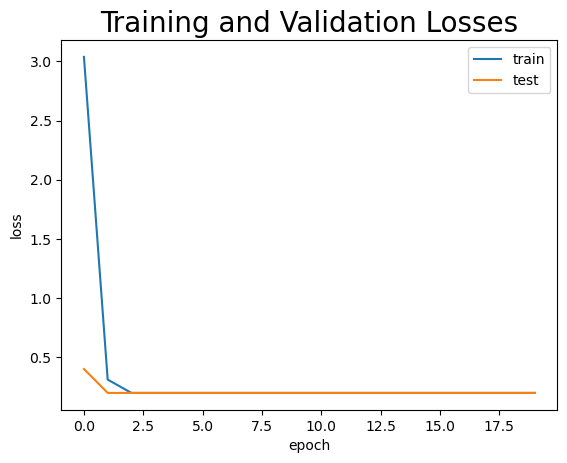

In [516]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Losses',size = 20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# creating S01_P_a

In [ ]:
d2=df.iloc[56:70,:]
d2.to_csv('S01_P_a.csv',index=False)
df2=pd.read_csv('S01_P_a.csv')
# Step 2: Normalize 
df_max_scaled2 = df2.copy() 
# apply normalization techniques 
for column in df_max_scaled2.columns: 
    df_min=min(df_max_scaled2[column])
    df_max=max(df_max_scaled2[column])
    if df_min!=df_max:
        df_max_scaled2[column] = (df_max_scaled2[column]-df_min) / (df_max-df_min)
print("\nNormalized dataset:")
# view normalized data 
display(df_max_scaled2)

In [ ]:
#Step 3 DWT
import numpy as np
import pywt
coeffs = pywt.dwt2(df_max_scaled2, 'haar')
cA, (cH, cV, cD) = coeffs
print("Approximation (cA):")
display(cA)
print("\nHorizontal detail (cH):")
display(cH)
print("\nVertical detail (cV):")
display(cV)
print("\nDiagonal detail (cD):")
display(cD)


np.savetxt('S01_P_acA.csv', cA,delimiter=',')
np.savetxt('S01_P_acH.csv', cH,delimiter=',')
np.savetxt('S01_P_acV.csv', cV,delimiter=',')
np.savetxt('S01_P_acD.csv', cD,delimiter=',')

# creating S01_P_e

In [ ]:
d4=df.iloc[123:133,:]
d4.to_csv('S01_P_e.csv',index=False)
df4=pd.read_csv('S01_P_e.csv')
print(df4)

# creating S01_I_i

In [ ]:
d5=df.iloc[133:188,:]
d5.to_csv("S01_I_i.csv",index=False)
df5=pd.read_csv("S01_I_i.csv")
print(df5)

# creating S01_P_i

In [ ]:
d6=df.iloc[188:200,:]
d6.to_csv("S01_P_i.csv",index=False)
df6=pd.read_csv("S01_P_i.csv")
print(df6)

# creating S01_I_o

In [18]:
d7=df.iloc[200:255,:]
d7.to_csv("S01_I_o.csv",index=False)
df7=pd.read_csv("S01_I_o.csv")
print(df7)

            0          1          2          3          4          5  \
0    8.297269   8.686002   8.941724   9.076147   9.105167   9.047739   
1   11.135462   9.642943   8.163283   6.706887   5.282806   3.898886   
2   -1.471029  -2.114228  -2.917173  -3.856362  -4.901963  -6.018540   
3    2.539362   2.960129   3.472577   4.056815   4.690850   5.351380   
4   -5.415353  -3.432275  -1.415051   0.593784   2.552640   4.422304   
5    5.373841   5.977043   6.450708   6.780554   6.957453   6.977913   
6    9.493756   9.277937   9.133890   9.070393   9.089891   9.188511   
7   10.705142  10.254788   9.716003   9.100978   8.425095   7.706330   
8   -3.260971  -2.816295  -2.312391  -1.753066  -1.144131  -0.493593   
9   -6.170208  -6.366040  -6.601541  -6.872056  -7.170751  -7.488252   
10  -8.891012  -8.500701  -8.096890  -7.681054  -7.255542  -6.823812   
11   4.934590   4.438628   3.971282   3.539416   3.148953   2.804810   
12  -6.274651  -6.016987  -5.712901  -5.348778  -4.915838  -4.41

# creating S01_P_o

In [19]:
d8=df.iloc[255:265,:]
d8.to_csv("S01_P_o.csv",index=False)
df8=pd.read_csv("S01_P_o.csv")
print(df8)

           0          1          2          3          4          5  \
0  17.753996  18.905404  19.915854  20.765887  21.439884  21.926738   
1  -1.063825  -1.106776  -1.339708  -1.755700  -2.340239  -3.071837   
2   6.480949   6.140424   5.807193   5.510582   5.276719   5.127077   
3 -10.828618 -11.381694 -11.895061 -12.343855 -12.705016 -12.958323   
4  14.272682  13.797842  13.362556  12.973893  12.632686  12.334026   
5  13.161271  14.669158  16.305293  18.044173  19.856034  21.707745   
6   6.984242   7.407393   7.628350   7.644041   7.461400   7.097236   
7   5.453560   5.236253   4.890710   4.425410   3.850494   3.177526   
8  -8.728102  -9.296530  -9.795189 -10.209934 -10.530916 -10.752294   
9  -2.520887  -2.211151  -1.863074  -1.493492  -1.121252  -0.766600   

           6          7          8          9  ...      24569      24570  \
0  22.220371  22.319965  22.229969  21.959960  ...  -7.392734  -7.311151   
1  -3.923010  -4.861500  -5.851715  -6.856221  ...   6.310666   7.

# creating S01_I_u

In [20]:
d9=df.iloc[265:320,:]
d9.to_csv("S01_I_u.csv",index=False)
df9=pd.read_csv("S01_I_u.csv")
print(df9)

            0          1          2          3          4          5  \
0    0.406778   1.015832   1.651122   2.293917   2.922786   3.514959   
1   26.420196  25.609905  24.704642  23.743663  22.766147  21.809670   
2   -1.448831  -1.812448  -2.252084  -2.728694  -3.198545  -3.615886   
3  -19.368797 -19.326733 -19.091185 -18.678224 -18.111863 -17.423012   
4   -1.069291  -0.982780  -0.908516  -0.871283  -0.893800  -0.995204   
5  -11.799694 -12.331522 -12.783450 -13.140917 -13.393913 -13.537299   
6   -4.594089  -4.467660  -4.282019  -4.036339  -3.733181  -3.378807   
7    7.710269   7.098422   6.518722   5.995217   5.547327   5.188904   
8   -5.640019  -5.754461  -5.644749  -5.313358  -4.772114  -4.041715   
9    4.298071   5.097689   5.804620   6.415918   6.931889   7.355566   
10   1.073853   0.950946   0.798044   0.601229   0.349790   0.037177   
11  -5.980526  -5.002358  -3.845323  -2.557690  -1.190249   0.205972   
12  37.943526  39.310351  40.363798  41.077534  41.438902  41.44

# creating S01_P_u

In [21]:
d10=df.iloc[320:330,:]
d10.to_csv("S01_P_u.csv",index=False)
df10=pd.read_csv("S01_P_u.csv")
print(df10)

           0          1          2          3          4          5  \
0 -14.655792 -13.796901 -12.914876 -12.031415 -11.170279 -10.356331   
1   0.045779   0.793525   1.621693   2.513427   3.449562   4.409430   
2   5.047609   5.415881   5.471412   5.215723   4.663013   3.838795   
3  20.666950  21.160292  21.630943  22.091343  22.552101  23.021347   
4   5.465540   6.345997   7.193214   7.981263   8.688398   9.297373   
5   5.769057   6.300213   7.011280   7.884704   8.895266  10.010968   
6   4.804442   4.228164   3.444241   2.494338   1.426320   0.291813   
7 -20.846471 -20.824917 -20.796958 -20.778596 -20.785889 -20.833459   
8 -24.687414 -23.165436 -21.500019 -19.770276 -18.055895 -16.433182   
9  11.689375  12.110329  12.426455  12.612164  12.647947  12.522194   

           6          7          8          9  ...      24569      24570  \
0  -9.614518  -8.968830  -8.441231  -8.050707  ...   2.583354   2.115025   
1   5.371758   6.315561   7.220944   8.069853  ...  -2.410315  -4.